In [36]:
#!pip install missingno imblearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import missingno as msno
import pickle
from sklearn import preprocessing

In [2]:
filename = 'data_baseline.pickle'
with open(filename, 'rb') as f:
    train,val, test = pickle.load(f)

C:\Users\rahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


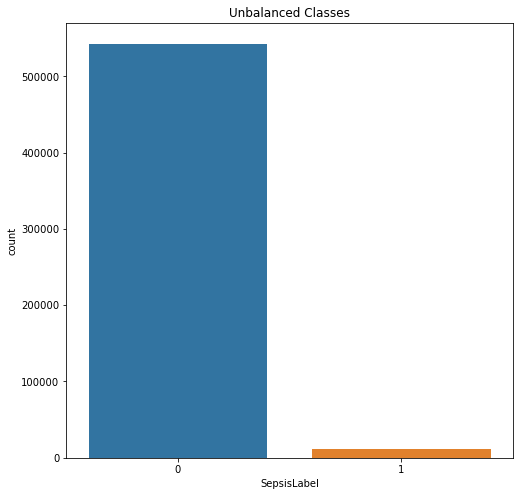

In [3]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=train)
plt.title('Unbalanced Classes')
plt.show()

###  Smote for removing class imbalance

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
sm = SMOTE(sampling_strategy=0.3, random_state=7)

In [6]:
training_data = train

In [7]:
training_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id
0,87.0,96.0,37.11,131.0,70.33,50.0,29.0,8.0,32.0,0.5,...,30.5,10.0,0.0,488.0,45.82,0,-1195.71,1,0,000003
1,87.0,96.0,37.11,131.0,70.33,50.0,29.0,8.0,32.0,0.5,...,30.5,10.0,0.0,488.0,45.82,0,-1195.71,2,0,000003
2,93.0,97.0,37.11,130.0,69.33,50.0,40.0,8.0,32.0,0.5,...,30.5,10.0,0.0,488.0,45.82,0,-1195.71,3,0,000003
3,90.0,95.0,37.11,128.0,69.33,50.0,23.0,8.0,32.0,0.5,...,30.5,10.0,0.0,488.0,45.82,0,-1195.71,4,0,000003
4,89.0,97.0,37.11,137.0,62.67,50.0,26.0,8.0,32.0,0.5,...,30.5,10.0,0.0,488.0,45.82,0,-1195.71,5,0,000003


In [8]:
training_data.shape

(554739, 39)

In [9]:
shuffled_df_over = training_data.sample(frac=1,random_state=7)
shuffled_df_over

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id
20,51.0,96.0,36.67,117.0,70.00,0.0,13.0,0.0,29.0,0.00,...,26.2,6.1,0.0,261.0,55.24,0,-0.03,22,0,017183
15,67.0,99.0,37.06,158.0,92.00,65.0,23.0,2.0,25.0,0.20,...,39.4,5.5,0.0,230.0,25.86,0,-50.05,16,0,007274
14,80.0,93.0,36.39,99.0,61.00,0.0,16.0,0.0,27.0,0.00,...,28.6,4.6,0.0,193.0,76.19,1,-0.02,15,0,012435
9,99.0,97.0,38.60,94.0,65.00,52.0,16.0,0.0,22.0,0.40,...,29.5,12.3,142.0,142.0,49.06,0,-2.47,12,0,009472
5,108.0,100.0,38.40,87.0,59.00,54.0,21.0,-1.0,25.0,0.40,...,37.8,18.4,0.0,223.0,53.80,1,-0.01,9,0,017283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,81.0,98.0,38.67,155.0,86.00,62.0,23.0,0.0,25.0,0.40,...,21.9,16.3,0.0,211.0,64.18,1,-0.03,5,0,011610
212,90.0,99.5,38.06,168.0,94.00,61.0,25.5,0.0,24.0,0.45,...,34.1,7.9,0.0,219.0,77.55,1,-61.88,213,0,002881
1,95.5,100.0,36.72,119.0,85.00,72.0,15.0,5.0,28.0,0.60,...,27.5,8.1,0.0,308.0,52.71,0,-0.39,2,0,012076
29,77.5,98.0,35.83,138.5,88.17,76.0,17.5,0.0,21.0,1.00,...,34.3,15.0,0.0,135.0,79.64,0,-0.02,30,0,019602


In [10]:
sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 1]
sepsis_df_over

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id
75,117.0,97.0,36.72,89.0,68.00,55.5,32.0,-8.0,19.0,0.50,...,45.6,7.8,689.0,62.0,86.26,1,-109.88,76,1,010355
46,83.0,100.0,37.44,105.0,72.33,64.0,24.0,-5.0,19.0,0.40,...,30.0,10.8,0.0,125.0,44.18,0,-0.03,47,1,005179
7,87.0,97.0,36.67,165.0,110.00,74.0,20.5,-3.0,20.0,0.50,...,81.6,6.8,0.0,252.0,73.48,0,-15.01,8,1,015426
33,105.0,97.0,37.83,112.0,82.00,66.0,12.0,0.0,23.0,0.40,...,30.5,4.8,0.0,294.0,61.64,1,-66.49,34,1,010700
40,73.0,99.0,37.44,171.0,102.00,73.0,21.0,-4.0,23.0,0.50,...,40.8,20.9,0.0,201.0,72.66,1,-0.02,44,1,008259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,93.0,98.0,37.50,0.0,68.00,0.0,18.0,9.0,31.0,0.70,...,53.5,6.8,0.0,43.0,47.88,1,-846.63,3,1,016101
21,120.0,99.0,38.50,109.0,76.33,0.0,14.5,0.0,26.0,0.40,...,34.8,4.3,0.0,95.0,51.52,0,-0.03,22,1,015085
73,77.0,96.0,38.44,137.0,87.00,63.0,24.0,2.0,20.0,0.40,...,24.1,14.4,0.0,193.0,71.99,0,-0.01,79,1,009622
5,86.5,97.0,37.70,91.5,62.50,45.5,16.5,0.0,0.0,0.40,...,0.0,0.0,0.0,0.0,88.01,1,-162.08,8,1,000616


In [11]:
non_sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 0].sample(n=11936,random_state=40)


In [12]:
normalized_df_over = pd.concat([sepsis_df_over, non_sepsis_df_over])

In [13]:
normalized_df_over

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id
75,117.0,97.0,36.72,89.0,68.00,55.5,32.0,-8.0,19.0,0.5,...,45.6,7.8,689.0,62.0,86.26,1,-109.88,76,1,010355
46,83.0,100.0,37.44,105.0,72.33,64.0,24.0,-5.0,19.0,0.4,...,30.0,10.8,0.0,125.0,44.18,0,-0.03,47,1,005179
7,87.0,97.0,36.67,165.0,110.00,74.0,20.5,-3.0,20.0,0.5,...,81.6,6.8,0.0,252.0,73.48,0,-15.01,8,1,015426
33,105.0,97.0,37.83,112.0,82.00,66.0,12.0,0.0,23.0,0.4,...,30.5,4.8,0.0,294.0,61.64,1,-66.49,34,1,010700
40,73.0,99.0,37.44,171.0,102.00,73.0,21.0,-4.0,23.0,0.5,...,40.8,20.9,0.0,201.0,72.66,1,-0.02,44,1,008259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,88.0,92.5,36.70,99.0,73.00,61.0,12.0,-2.0,21.0,0.5,...,33.8,11.9,307.0,117.0,57.80,1,-3.12,5,0,015306
4,67.0,98.0,36.50,103.0,65.00,48.0,18.0,-3.0,22.0,0.5,...,32.5,19.6,0.0,301.0,50.67,0,-0.04,6,0,014289
26,96.0,98.0,37.22,110.5,64.00,43.0,17.0,-2.0,24.0,0.5,...,23.7,15.1,0.0,187.0,73.60,0,-112.80,28,0,000805
16,68.0,95.0,37.11,161.0,88.00,59.0,21.0,0.0,22.0,0.0,...,30.3,11.6,0.0,222.0,70.99,1,-23.27,17,0,015347


C:\Users\rahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


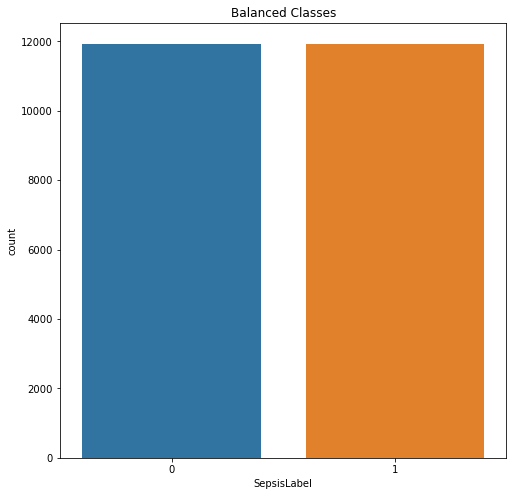

In [14]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=normalized_df_over)
plt.title('Balanced Classes')
plt.show()

In [15]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554739 entries, 0 to 41
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                554739 non-null  float64
 1   O2Sat             554739 non-null  float64
 2   Temp              554739 non-null  float64
 3   SBP               554739 non-null  float64
 4   MAP               554739 non-null  float64
 5   DBP               554739 non-null  float64
 6   Resp              554739 non-null  float64
 7   BaseExcess        554739 non-null  float64
 8   HCO3              554739 non-null  float64
 9   FiO2              554739 non-null  float64
 10  pH                554739 non-null  float64
 11  PaCO2             554739 non-null  float64
 12  SaO2              554739 non-null  float64
 13  AST               554739 non-null  float64
 14  BUN               554739 non-null  float64
 15  Alkalinephos      554739 non-null  float64
 16  Calcium           554739

In [16]:
# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(training_data.drop('SepsisLabel', axis=1), training_data['SepsisLabel'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
#oversampled_train.columns = normalized_df_over.columns


oversampled_train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'patient_id', 'SepsisLabel'],
      dtype='object')

C:\Users\rahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


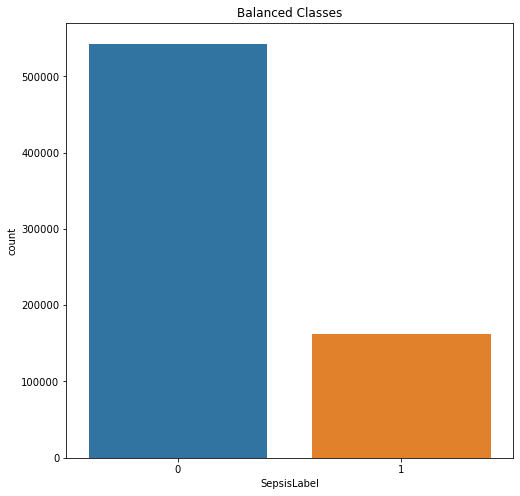

In [17]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=oversampled_train)
plt.title('Balanced Classes')
plt.show()

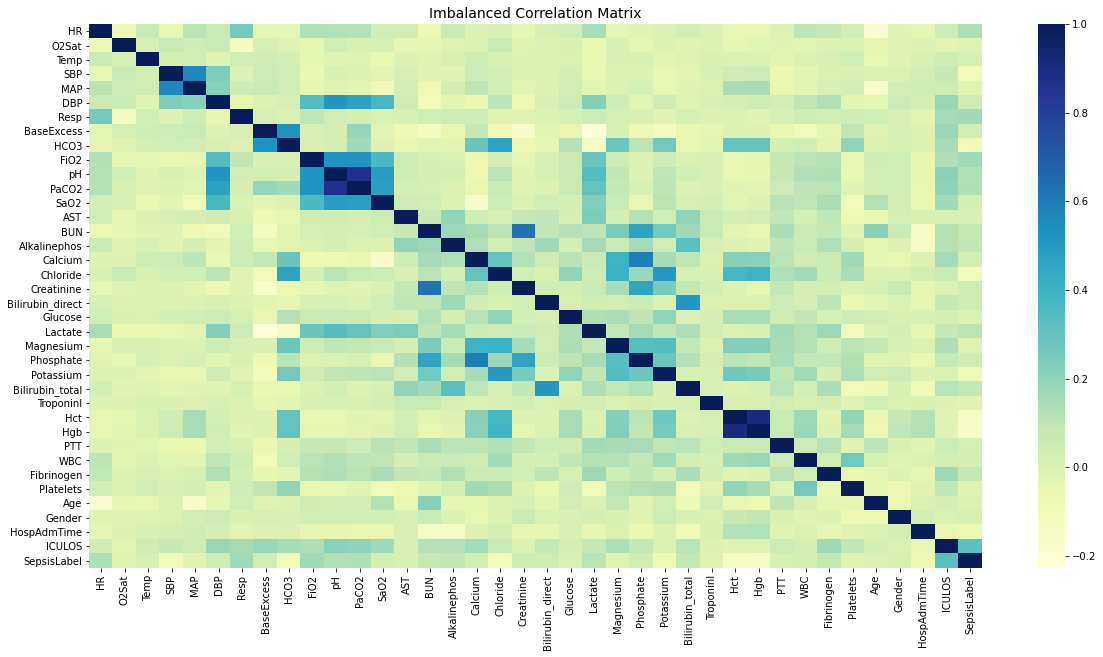

In [18]:
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

##### do the same for validation and test data

In [19]:
validation_data = val
sm2 = SMOTE(sampling_strategy='minority', random_state=7)
shuffled_df_over = validation_data.sample(frac=1,random_state=7)
sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 1]
non_sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 0].sample(n=sepsis_df_over.shape[0],random_state=40)
normalized_df_over = pd.concat([sepsis_df_over, non_sepsis_df_over])
oversampled_validX, oversampled_validY = sm2.fit_resample(validation_data.drop('SepsisLabel', axis=1), validation_data['SepsisLabel'])
oversampled_valid = pd.concat([pd.DataFrame(oversampled_validY), pd.DataFrame(oversampled_validX)], axis=1)
#oversampled_valid.columns = normalized_df_over.columns

testing_data = test
sm3 = SMOTE(sampling_strategy='minority', random_state=7)
shuffled_df_over = testing_data.sample(frac=1,random_state=7)
sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 1]
non_sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 0].sample(n=sepsis_df_over.shape[0],random_state=40)
normalized_df_over = pd.concat([sepsis_df_over, non_sepsis_df_over])
oversampled_testX, oversampled_testY = sm3.fit_resample(testing_data.drop('SepsisLabel', axis=1), testing_data['SepsisLabel'])
oversampled_test = pd.concat([pd.DataFrame(oversampled_testY), pd.DataFrame(oversampled_testX)], axis=1)
#oversampled_test.columns = normalized_df_over.columns

In [20]:
oversampled_train.shape

(705643, 39)

In [21]:
oversampled_test.shape

(230622, 39)

In [22]:
oversampled_valid.shape

(229930, 39)

In [23]:
train=oversampled_train
val=oversampled_valid
test=oversampled_test

### Feature selection 

In [24]:
sample_size=100000
train_sample = train.sample(n=int(0.7*sample_size))
val_sample=val.sample(n=int(0.15*sample_size))
test_sample=test.sample(n=int(0.15*sample_size))

In [25]:
X_feature = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS']
y_feature = 'SepsisLabel'

In [26]:
X_train = train[X_feature]
y_train = train[y_feature]
X_val = val[X_feature]
y_val = val[y_feature]
X_test = test[X_feature]
y_test = test[y_feature]

# X_train = train_sample[X_feature]
# y_train = train_sample[y_feature]
# X_val = val_sample[X_feature]
# y_val = val_sample[y_feature]
# X_test = test_sample[X_feature]
# y_test = test_sample[y_feature]


In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=1211), max_features=37)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
display(embeded_rf_feature)

14 selected features


['Temp',
 'SBP',
 'BUN',
 'Creatinine',
 'Glucose',
 'Lactate',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Platelets',
 'Age',
 'HospAdmTime',
 'ICULOS']

In [28]:
# X_train_fs = train_sample[embeded_rf_feature]
# X_val_fs = val_sample[embeded_rf_feature]

X_train_fs = train[embeded_rf_feature]
X_val_fs = val[embeded_rf_feature]

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
best = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=10, n_estimators=150, class_weight='balanced_subsample',verbose=2)
best.fit(X_train_fs,y_train)

y_pred_best = best.predict(X_val_fs)
y_pred_proba_best = best.predict_proba(X_val_fs)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_val, y_pred_proba_best)
auc_best = auc(recall_best, precision_best)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)
auroc = auc(fpr, tpr)

print(classification_report(y_val, y_pred_best))
print('F1 score:', f1_score(y_val,y_pred_best))
print('Precision:', precision_score(y_val,y_pred_best))
print('Recall:', recall_score(y_val,y_pred_best))
print('AUPRC:', auc_best)
print('AUC:', auroc)
print('Accuracy:', accuracy_score(y_val,y_pred_best))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 150


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.0s finished


              precision    recall  f1-score   support

           0       0.64      0.90      0.75    114965
           1       0.83      0.50      0.62    114965

    accuracy                           0.70    229930
   macro avg       0.74      0.70      0.69    229930
weighted avg       0.74      0.70      0.69    229930

F1 score: 0.6233702578178609
Precision: 0.8336270811180866
Recall: 0.4978123776801635
AUPRC: 0.8051806994154302
AUC: 0.8118676674241869
Accuracy: 0.6992302004958031


Text(0.5, 1.0, 'Precision-Recall Curve For SMOTE w/ Feature Selection')

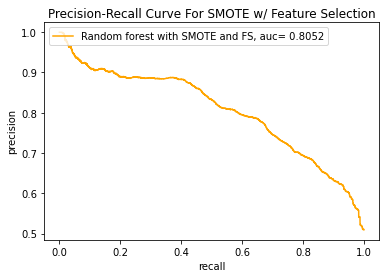

In [30]:
plt.plot(recall_best,precision_best,color = 'orange', label="Random forest with SMOTE and FS, auc= %.4f" %auc_best)

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 2)
plt.title('Precision-Recall Curve For SMOTE w/ Feature Selection')

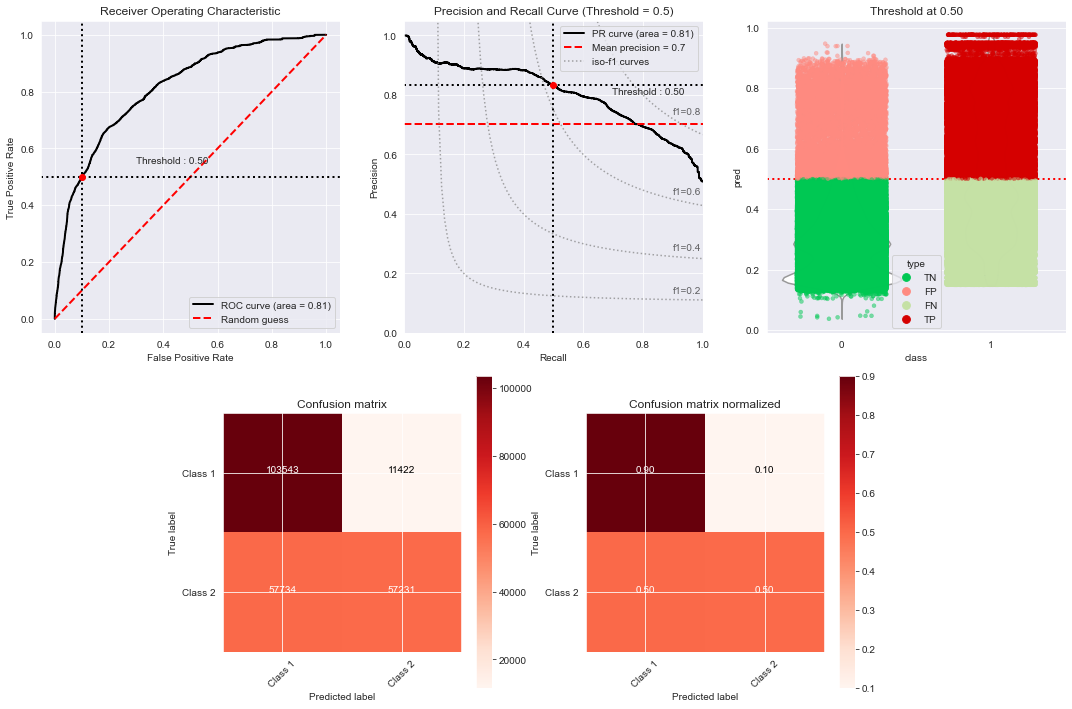

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.64      0.90      0.75    114965
     Class 2       0.83      0.50      0.62    114965

    accuracy                           0.70    229930
   macro avg       0.74      0.70      0.69    229930
weighted avg       0.74      0.70      0.69    229930



In [31]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_val, y_pred_proba_best, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()